# Lab | Imbalanced data

# 1. Load the dataset and explore the variables.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customer_churn = pd.read_csv('./files_for_lab/customer_churn.csv')
customer_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
def standardize_column_names (df: pd.DataFrame) -> pd.DataFrame:
    '''
    This function takes a Pandas DataFrame as an input and standardizes the names of its columns,
    transforming all the letters to lower case and replacing the spaces with '_'.

    Inputs:
    df: Pandas DataFrame

    Outputs:
    A pandas DataFrame with its columns' names standardized.
    '''

    df2=df.copy()
    cols = []
    for colname in df2.columns:
        cols.append(colname.lower().replace(" ","_"))

    df2.columns = cols
    return df2

In [4]:
customer_churn = standardize_column_names(customer_churn)
customer_churn.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [6]:
customer_churn.shape

(7043, 21)

In [7]:
customer_churn.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [8]:
customer_churn.isna().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

# 2. We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.

In [9]:
regression_variables = customer_churn[['churn', 'tenure', 'seniorcitizen', 'monthlycharges']]
regression_variables.head()

,churn,tenure,seniorcitizen,monthlycharges
0,No,1,0,29.85
1,No,34,0,56.95
2,Yes,2,0,53.85
3,No,45,0,42.30
4,Yes,2,0,70.70


The values of the churn column are replaced with 0 and 1 to make future calculations easier.

In [10]:
regression_variables['churn'] = regression_variables['churn'].replace({'No':0, 'Yes':1})
regression_variables.head()

C:\Users\laura\AppData\Local\Temp\ipykernel_7892\370986357.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regression_variables['churn'] = regression_variables['churn'].replace({'No':0, 'Yes':1})


,churn,tenure,seniorcitizen,monthlycharges
0,0,1,0,29.85
1,0,34,0,56.95
2,1,2,0,53.85
3,0,45,0,42.30
4,1,2,0,70.70


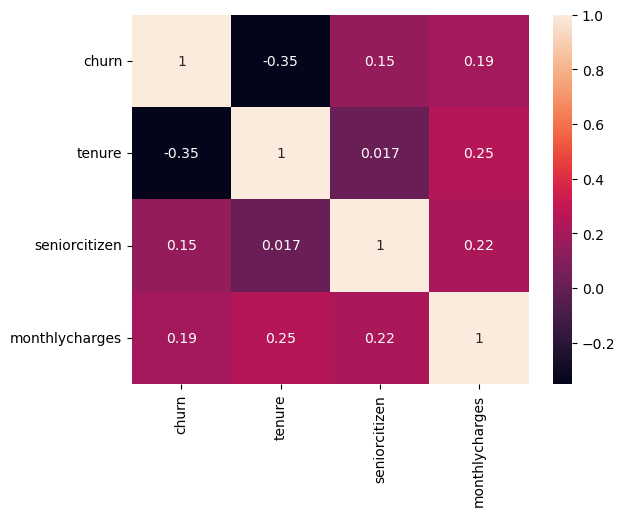

In [11]:
correlation_matrix = regression_variables.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

This correlation matrix shows that there is no multicolinearity between the variables that will be used to predict the variable churn.

In [12]:
regression_variables.skew()

churn             1.063031
tenure            0.239540
seniorcitizen     1.833633
monthlycharges   -0.220524
dtype: float64

There will be no need to transform the columns because their skewness is inside the range [-2,2].

In [13]:
regression_variables.describe()

,churn,tenure,seniorcitizen,monthlycharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,32.371149,0.162147,64.761692
std,0.441561,24.559481,0.368612,30.090047
min,0.000000,0.000000,0.000000,18.250000
25%,0.000000,9.000000,0.000000,35.500000
50%,0.000000,29.000000,0.000000,70.350000
75%,1.000000,55.000000,0.000000,89.850000
max,1.000000,72.000000,1.000000,118.750000


# 3. Split the Dataset into X ('tenure', 'SeniorCitizen', 'MonthlyCharges') and y ('Churn')

In [14]:
y = regression_variables['churn']
X = regression_variables.drop('churn',axis=1)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Build the logistic regression model.

In [16]:
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler()
transformer.fit(X_train)

X_train_scaled_np = transformer.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled_np, columns=X_train.columns, index=X_train.index)
# because this is the only tranformation we apply to the numerics, (there are no categorical features in the df)
# we can immediately transform the X_test as well
X_test_scaled_np = transformer.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled_np , columns=X_test.columns, index=X_test.index)
X_train_scaled.head()

,tenure,seniorcitizen,monthlycharges
2142,-0.465683,-0.437749,-0.000474
1623,0.885537,-0.437749,1.074754
6074,-1.284605,-0.437749,-1.376499
1362,-1.161766,-0.437749,0.177346
6754,-1.325551,-0.437749,-0.098524


In [17]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0, solver='lbfgs')
lr.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

# 5. Evaluate the model.

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

y_pred_test = lr.predict(X_test_scaled)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))

The accuracy in the TEST set is: 0.81
The precision in the TEST set is: 0.70
The recall in the TEST set is: 0.49
The F1 in the TEST set is: 0.57
The Kappa in the TEST set is: 0.45


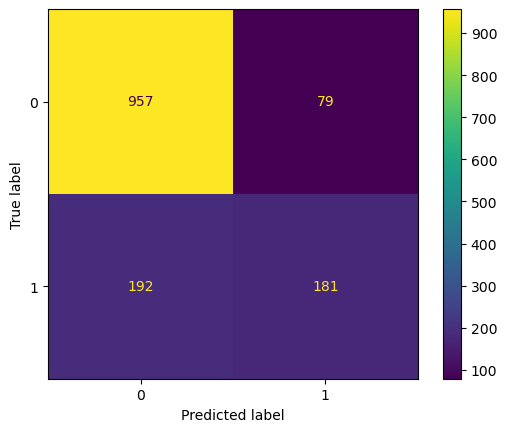

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

The accuracy obtained is not bad, but the recall is too low. Only a 49% of the positive cases were predicted correctly.

# 6. Even a simple model will give us more than 70% accuracy. Why?

No     5174
Yes    1869
Name: churn, dtype: int64


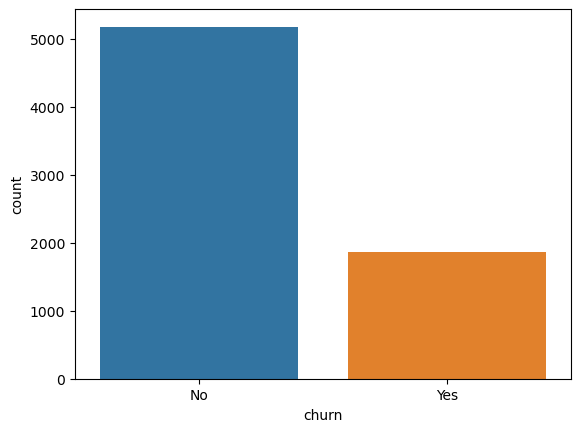

In [20]:
count_classes = customer_churn['churn'].value_counts()
print(count_classes)
sns.countplot(x = 'churn', data = customer_churn);
plt.show()

In this dataset there is a large class imbalance. A model can predict the value of the majority class for all the predictions and achieve a high classification accuracy.

# 7. Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [21]:
from imblearn.over_sampling import SMOTE

In [22]:
sm = SMOTE(random_state=100,k_neighbors=3)

X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scaled,y_train)

In [23]:
print(X_train.shape)
print(X_train_SMOTE.shape)

(5634, 3)
(8276, 3)


In [24]:
y_train_SMOTE.value_counts()

0    4138
1    4138
Name: churn, dtype: int64

In [25]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_test = lr.predict(X_test_scaled)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))

The accuracy in the TEST set is: 0.75
The precision in the TEST set is: 0.51
The recall in the TEST set is: 0.77
The F1 in the TEST set is: 0.61
The Kappa in the TEST set is: 0.44


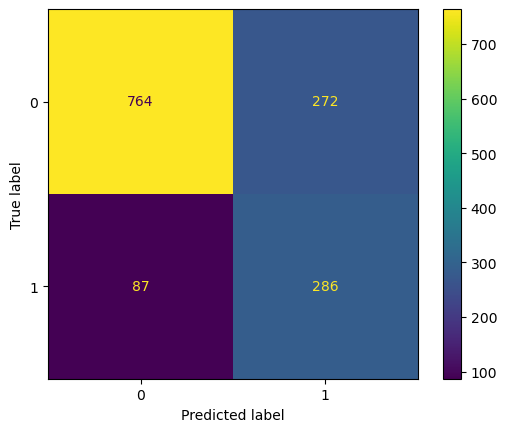

In [26]:
cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

After using SMOTE the value of the recall significantly increased to 0.77, but the accuracy and precision decreased. The F1 and Kappa values show that the model still doesn't have a great performance. 